# 01. Data Processing
> 데이터 전처리

## 환경 설정

라이브러리

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

<br>
<br>

## 1. 코로나 전후 서울시 매출총액, 영업이익총액 변화 (2019 - 2020)

보안상 공개 불가: 지역 별 통계 데이터(기업) (출처: 한국기업데이터)



<br>
<br>

## 2. 코로나 전후 서울시 총 소비 변화 (2019 - 2020)

보안상 공개 불가: 서울시 지역단위 '소득', '지출', '금융자산' 정보 (출처: 신한은행)

<br>
<br>

## 3. 서울시 우리마을가게 상권분석서비스 데이터 전처리

모든 데이터는 코로나로 인한 매출의 변화 이후인 2020년 이후의 데이터를 사용한다.

In [ ]:
living = pd.read_csv("/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/서울시 우리마을가게 상권분석서비스(상권-생활인구).csv", encoding='cp949')
workers = pd.read_csv("/content/gdrive/MyDrive/pjt-seoul-market-analysis//data/서울시 우리마을가게 상권분석서비스(상권-직장인구).csv", encoding='cp949')
resident = pd.read_csv("/content/gdrive/MyDrive/pjt-seoul-market-analysis//data/서울시 우리마을가게 상권분석서비스(상권_상주인구).csv", encoding='cp949')
apartment = pd.read_csv("/content/gdrive/MyDrive/pjt-seoul-market-analysis//data/서울시 우리마을가게 상권분석서비스(상권-아파트).csv", encoding='cp949')
store = pd.read_csv("/content/gdrive/MyDrive/pjt-seoul-market-analysis//data/서울시 우리마을가게 상권분석서비스(상권-점포).csv", encoding='cp949')
facility = pd.read_csv("/content/gdrive/MyDrive/pjt-seoul-market-analysis//data/서울시 우리마을가게 상권분석서비스(상권-집객시설).csv", encoding='cp949')
sales2021 = pd.read_csv("/content/gdrive/MyDrive/pjt-seoul-market-analysis//data/서울시 우리마을가게 상권분석서비스(상권-추정매출).csv", encoding='cp949')
sales2020 = pd.read_csv("/content/gdrive/MyDrive/pjt-seoul-market-analysis//data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2020.csv", encoding='cp949')

<br>

### 3-1. 생활 인구

2020년 이후 상권 구분 코드 명,	상권 코드 명 별 총 생활인구 수 데이터를 추출한다. 상권에 영향을 주는 것은 성별에 따른 생활 인구 수가 아닌 총 생활 인구 수 자체에 있다고 보았다. 성별 생활 인구는 총 생활 인구 수에 포함된다고 판단하여 제거하였다.

In [ ]:
living = living.fillna(0)

In [ ]:
living = living[['기준 년코드', ' 상권_구분_코드_명', '상권_코드_명', '총_생활인구_수']]
living = living[living['기준 년코드'] >= 2020]

In [ ]:
living.columns = ['기준_년_코드', '상권_구분_코드_명', '상권_코드_명', '총_생활인구_수']

In [ ]:
living = living[['총_생활인구_수']].groupby([living['상권_구분_코드_명'], living['상권_코드_명']]).sum()

In [ ]:
living['상권_구분_코드_명'] = living.index.map(lambda x: x[0])
living['상권_코드_명'] = living.index.map(lambda x: x[1])

In [ ]:
living = living.reset_index(drop=True)

In [ ]:
living.head()

,총_생활인구_수,상권_구분_코드_명,상권_코드_명
0,2335925,골목상권,가로공원로58길
1,3369362,골목상권,가로공원로76가길
2,2909779,골목상권,가로공원로80길
3,3634107,골목상권,가마산로61길
4,1105993,골목상권,가산로3길


In [ ]:
living.head()

,총_생활인구_수,상권_구분_코드_명,상권_코드_명
0,2335925,골목상권,가로공원로58길
1,3369362,골목상권,가로공원로76가길
2,2909779,골목상권,가로공원로80길
3,3634107,골목상권,가마산로61길
4,1105993,골목상권,가산로3길


<br>

### 3-2. 직장 인구

2020년 이후 상권 구분 코드 명, 상권 코드 명 별 총 직장 인구를 추출한다.

In [ ]:
workers = workers.fillna(0)

In [ ]:
workers = workers[['기준_년월_코드', '상권_구분_코드_명', '상권_코드_명', '총_직장_인구_수']]
workers = workers[workers['기준_년월_코드'] >= 2020]

In [ ]:
workers = pd.DataFrame(workers['총_직장_인구_수'].groupby([workers['상권_구분_코드_명'], workers['상권_코드_명']]).sum())

In [ ]:
workers['상권_구분_코드_명'] = workers.index.map(lambda x: x[0])
workers['상권_코드_명'] = workers.index.map(lambda x : x[1])

In [ ]:
workers = workers.reset_index(drop=True)

In [ ]:
workers.head()

,총_직장_인구_수,상권_구분_코드_명,상권_코드_명
0,455,골목상권,가로공원로58길
1,840,골목상권,가로공원로76가길
2,1350,골목상권,가로공원로80길
3,235,골목상권,가마산로61길
4,4995,골목상권,가산로3길


<br>

### 3-3. 상주 인구

2020년 이후 상권 구분 코드 명, 상권 코드 명 별 총 상주인구 수를 추출한다.

In [ ]:
resident = resident.fillna(0)

In [ ]:
resident = resident[['기준_년_코드', '상권_구분_코드_명', '상권 코드 명', '총 상주인구 수']]

In [ ]:
resident = pd.DataFrame(resident['총 상주인구 수'].groupby([resident['상권_구분_코드_명'], resident['상권 코드 명']]).sum())

In [ ]:
resident.columns = ['총_상주인구_수']
resident.index.names = ['상권_구분_코드_명', '상권_코드_명']

In [ ]:
resident['상권_구분_코드_명'] = resident.index.map(lambda x: x[0])
resident['상권_코드_명'] = resident.index.map(lambda x : x[1])

In [ ]:
resident = resident.reset_index(drop=True)

In [ ]:
resident.head()

,총_상주인구_수,상권_구분_코드_명,상권_코드_명
0,69090,골목상권,가로공원로58길
1,91494,골목상권,가로공원로76가길
2,82492,골목상권,가로공원로80길
3,47900,골목상권,가마산로61길
4,29570,골목상권,가산로3길


<br>

### 3-4. 아파트

2020년 이후 상권 구분 코드 명, 상권 코드 명 별 아파트 단지수를 추출한다.

In [ ]:
apartment = apartment.fillna(0)

In [ ]:
apartment = apartment[['기준_년_코드', '상권_구분_코드_명', '상권_코드_명', '아파트_단지_수']]
apartment = apartment[apartment['기준_년_코드'] >= 2020]

In [ ]:
apartment = apartment[['상권_코드_명', '아파트_단지_수']].groupby([apartment['상권_구분_코드_명'], apartment['상권_코드_명']]).sum()

In [ ]:
apartment['상권_구분_코드_명'] = apartment.index.map(lambda x: x[0])
apartment['상권_코드_명'] = apartment.index.map(lambda x: x[1])

In [ ]:
apartment = apartment.reset_index(drop=True)

In [ ]:
apartment.head()

,아파트_단지_수,상권_구분_코드_명,상권_코드_명
0,35,골목상권,가로공원로58길
1,385,골목상권,가로공원로76가길
2,430,골목상권,가로공원로80길
3,45,골목상권,가마산로61길
4,55,골목상권,가산로3길


<br>

### 3-5. 상점

2020년 이후 상권 구분 코드 명, 상권 코드 명 별 서비스 업종 분류 항목의 점포 수를 추출한다. 100개의 서비스 업종 코드 명은 [한국표준산업분류](http://kssc.kostat.go.kr/ksscNew_web/kssc/common/ClassificationContent.do?gubun=1&strCategoryNameCode=001&categoryMenu=007&addGubun=no) 기준에 따라 음식점, 카페, 의료, 쇼핑, 교육, 오락스포츠, 의류잡화, 관광숙박의 8개 항목으로 분류하여 구분하였다.

| 구분 | 서비스 업종 |
|:--------:|:--------:|
| 음식점 | '호프-간이주점', '분식전문점', '치킨전문점', '패스트푸드점', '제과점', <br>'양식음식점', '일식음식점', '중식음식점', '한식음식점', '반찬가게', '청과상', '수산물판매' |
| 카페 | '커피-음료' |
| 의료 | '한의원', '치과의원',   '일반의원', '의료기기', '의약품', '동물병원' |
| 쇼핑 | '편의점', '슈퍼마켓', '완구', '문구', '서적', '예술품', '재생용품 판매점', <br>'전자상거래업', '악기', '육류판매', '미곡판매', '주류도매' |
| 교육 | '독서실', '고시원', '컴퓨터학원', '예술학원', '외국어학원', '일반교습학원' |
| 오락스포츠 | '볼링장', '스포츠 강습', '기타오락장', '전자게임장', 'PC방', <br>'골프연습장', '당구장', '사진관', 'DVD방', '노래방', '운동/경기용품', '스포츠클럽' |
| 의류잡화 | '시계및귀금속', '안경', '가방', '신발', '유아의류', '한복점', '일반의류', '섬유제품', '세탁소' |
| 관광숙박 | '게스트하우스', '여관', '여행사' |

In [ ]:
store = store.fillna(0)

In [ ]:
store = store[['기준_년_코드', '상권_구분_코드_명', '상권_코드_명','서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '프랜차이즈_점포_수']]
store = store[store['기준_년_코드'] >= 2020]

In [ ]:
store['점포_수'] = store['점포_수'] + store['유사_업종_점포_수'] + store['프랜차이즈_점포_수']
store = store.drop(['유사_업종_점포_수', '프랜차이즈_점포_수'], axis=1)

In [ ]:
store = store.assign(구분=0)

In [ ]:
# food, cafe, medi, shop, edu, sport, cloth, tour = [], [], [], [], [], [], [], []

# for idx, service in enumerate(store['서비스_업종_코드_명']):
#   if service in ['호프-간이주점', '분식전문점', '치킨전문점', '패스트푸드점', '제과점', '양식음식점', '일식음식점', '중식음식점', '한식음식점', '반찬가게', '청과상', '수산물판매']:
#     store['구분'][idx] = '음식점'
#   elif service in ['커피-음료']:
#     store['구분'][idx] = '카페'
#   elif service in ['한의원', '치과의원', '일반의원', '의료기기', '의약품', '동물병원']:
#     store['구분'][idx] = '의료'
#   elif service in ['편의점', '슈퍼마켓', '완구', '문구', '서적', '예술품', '재생용품 판매점', '전자상거래업', '악기', '육류판매', '미곡판매', '주류도매']:
#     store['구분'][idx] = '쇼핑'
#   elif service in ['독서실', '고시원', '컴퓨터학원', '예술학원', '외국어학원', '일반교습학원']:
#     store['구분'][idx] = '교육'
#   elif service in ['볼링장', '스포츠 강습', '기타오락장', '전자게임장', 'PC방', '골프연습장', '당구장', '사진관', 'DVD방', '노래방', '운동/경기용품', '스포츠클럽']:
#     store['구분'][idx] = '오락서비스'
#   elif service in ['시계및귀금속', '안경', '가방', '신발', '유아의류', '한복점', '일반의류', '섬유제품', '세탁소']:
#     store['구분'][idx] = '의류잡화'
#   else:
#     store['구분'][idx] = '관광숙박'

In [ ]:
# store.to_pickle("./store.pkl")

In [ ]:
store = pd.read_pickle('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/store.pkl')

In [ ]:
store = pd.pivot_table(store,
                      index=['상권_구분_코드_명', '상권_코드_명'],
                      columns='구분',
                      values='점포_수',
                      aggfunc='sum')

In [ ]:
store['상권_구분_코드_명'] = store.index.map(lambda x: x[0])
store['상권_코드_명'] = store.index.map(lambda x : x[1])

In [ ]:
store = store.reset_index(drop=True)

In [ ]:
store = store.fillna(0)
store.head()

구분,관광숙박,교육,쇼핑,오락서비스,음식점,의료,의류잡화,카페,상권_구분_코드_명,상권_코드_명
0,130.0,48.0,88.0,0.0,62.0,20.0,60.0,0.0,골목상권,가로공원로58길
1,308.0,66.0,202.0,120.0,220.0,60.0,98.0,20.0,골목상권,가로공원로76가길
2,460.0,100.0,178.0,28.0,134.0,16.0,156.0,44.0,골목상권,가로공원로80길
3,330.0,60.0,94.0,102.0,290.0,50.0,70.0,46.0,골목상권,가마산로61길
4,284.0,10.0,200.0,98.0,374.0,10.0,30.0,40.0,골목상권,가산로3길


<br>

### 3-6. 집객 시설
2020년 이후 상권 구분 코드 명, 상권 코드 명 별 집객 시설 수를 추출한다. 

- 의료 관련 시설은 1-5번의 의료와 겹치므로 제거했다.
- 관공서 수는 상권에 직접적인 영향이 없다고 판단하여 제거했다.
- 초등학교 수, 중학교 수, 고등학교 수, 대학교 수를 합쳐 학교 수로 나타냈다.
- 쇼핑 관련 시설 역시 1-5의 쇼핑과 겹치므로 제거했다.
- 공항 수, 철도 역 수, 버스 터미널 수, 지하철 역 수, 버스 정거장 수를 합쳐서 교통 시설 수로 나타냈다.


In [ ]:
facility = facility.fillna(0)

In [ ]:
facility['교통시설_수'] = facility['공항_수'] + facility['철도_역_수'] + facility['버스_터미널_수'] + facility['지하철_역_수'] + facility['버스_정거장_수']
facility['학교_수'] = facility['초등학교_수'] + facility['중학교_수'] + facility['고등학교_수'] + facility['대학교_수']

In [ ]:
facility = facility[['기준_년_코드', '상권_구분_코드_명', '상권_코드_명', '집객시설_수', '관공서_수', '교통시설_수', '학교_수']]
facility = facility[facility['기준_년_코드'] >= 2020]

In [ ]:
facility = pd.DataFrame(facility[['집객시설_수', '교통시설_수', '학교_수']].groupby([facility['상권_구분_코드_명'], facility['상권_코드_명']]).sum())

In [ ]:
facility['상권_구분_코드_명'] = facility.index.map(lambda x: x[0])
facility['상권_코드_명'] = facility.index.map(lambda x : x[1])

In [ ]:
facility = facility.reset_index(drop=True)

In [ ]:
facility.head()

,집객시설_수,교통시설_수,학교_수,상권_구분_코드_명,상권_코드_명
0,20,0.0,0.0,골목상권,가로공원로58길
1,45,0.0,0.0,골목상권,가로공원로76가길
2,20,0.0,0.0,골목상권,가로공원로80길
3,25,5.0,0.0,골목상권,가마산로61길
4,35,25.0,0.0,골목상권,가산로3길


<br>

### 3-7. 추정 매출

2020년 이후 상권 구분 코드 명, 상권 코드 명 별 매출 금액과 건수를 추출한다. 분기당 매출 금액과	분기당 매출 건수를 합하여 전체 매출 금액과 건수를 구한다.

In [ ]:
sales = pd.concat([sales2021, sales2020]) 

In [ ]:
sales = sales.fillna(0)

In [ ]:
sales = pd.DataFrame(sales[['분기당_매출_금액', '분기당_매출_건수']].groupby([sales['상권_구분_코드_명'], sales['상권_코드_명']]).sum())

In [ ]:
sales['상권_구분_코드_명'] = sales.index.map(lambda x: x[0])
sales['상권_코드_명'] = sales.index.map(lambda x : x[1])

In [ ]:
sales = sales.reset_index(drop=True)

In [ ]:
sales.columns = ['매출_금액', '매출_건수', '상권_구분_코드_명', '상권_코드_명']

In [ ]:
sales.head()

,매출_금액,매출_건수,상권_구분_코드_명,상권_코드_명
0,2.616995e+09,228566,골목상권,가로공원로58길
1,1.012329e+10,722503,골목상권,가로공원로76가길
2,1.917132e+10,720964,골목상권,가로공원로80길
3,4.668594e+09,277527,골목상권,가마산로61길
4,2.983898e+10,719243,골목상권,가산로3길


<br>
<br>

## 4. 최종 상권 데이터 추출

위에서 구한 항목들이 추가된 최종 상권 데이터를 추출한다.

In [ ]:
data = pd.merge(living, workers, how='inner')
data = pd.merge(data, store, how='inner')
data = pd.merge(data, resident, how='inner')
data = pd.merge(data, apartment, how='inner')
data = pd.merge(data, facility, how='inner')
data = pd.merge(data, sales, how='inner')
data.head()

,총_생활인구_수,상권_구분_코드_명,상권_코드_명,총_직장_인구_수,관광숙박,교육,쇼핑,오락서비스,음식점,의료,의류잡화,카페,총_상주인구_수,아파트_단지_수,집객시설_수,교통시설_수,학교_수,매출_금액,매출_건수
0,2335925,골목상권,가로공원로58길,455,130.0,48.0,88.0,0.0,62.0,20.0,60.0,0.0,69090,35,20,0.0,0.0,2.616995e+09,228566
1,3369362,골목상권,가로공원로76가길,840,308.0,66.0,202.0,120.0,220.0,60.0,98.0,20.0,91494,385,45,0.0,0.0,1.012329e+10,722503
2,2909779,골목상권,가로공원로80길,1350,460.0,100.0,178.0,28.0,134.0,16.0,156.0,44.0,82492,430,20,0.0,0.0,1.917132e+10,720964
3,3634107,골목상권,가마산로61길,235,330.0,60.0,94.0,102.0,290.0,50.0,70.0,46.0,47900,45,25,5.0,0.0,4.668594e+09,277527
4,1105993,골목상권,가산로3길,4995,284.0,10.0,200.0,98.0,374.0,10.0,30.0,40.0,29570,55,35,25.0,0.0,2.983898e+10,719243


In [ ]:
data.to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/data.csv')

<br>
<br>

## 5. 최종 상권 데이터 Scaling

각 변수의 단위가 다르므로 더 큰 값을 가진 변수가 결과값에 더 큰 영향을 미칠 수 있다. 예를 들어 점포 수의 개수와 인구 수 중 값이 더 큰 인구 수가 결과값에 더 큰 영향을 미칠 수 있다. 따라서 각 항목을 동일한 scale로 맞추기 위해 scaling 전처리를 해준다.

매출 금액은 분류된 상권의 구매력을 보기 위한 평가 척도로 사용할 것이기에 따로 저장한 뒤 나머지 항목에 대해 scaling을 진행한다.

In [ ]:
sales_data = data[['상권_구분_코드_명', '상권_코드_명', '매출_금액', '매출_건수']]

In [ ]:
sales_data.to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/sales_data.csv')

<br>

### 5-1. 최소 - 최대 정규화 (Min-Max Normalization)

데이터를 0과 1 사이의 값으로 변환하여 특정 데이터가 있는 위치가 어디인지를 알 수 있도록 정규화시킨다.

In [ ]:
num_columns = ['총_생활인구_수', '아파트_단지_수', '관광숙박', '교육', '쇼핑', '오락서비스', '음식점', '의료', '의류잡화', '카페', '총_직장_인구_수', '집객시설_수', '교통시설_수', '학교_수', '총_상주인구_수']

In [ ]:
minmax_scaler = MinMaxScaler()
minmax_scaling = minmax_scaler.fit_transform(data[num_columns])

In [ ]:
minmax_scaling_data = pd.concat([data[['상권_구분_코드_명', '상권_코드_명']], pd.DataFrame(minmax_scaling, columns = num_columns)], axis=1)

In [ ]:
minmax_scaling_data.to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/scaling_data.csv')

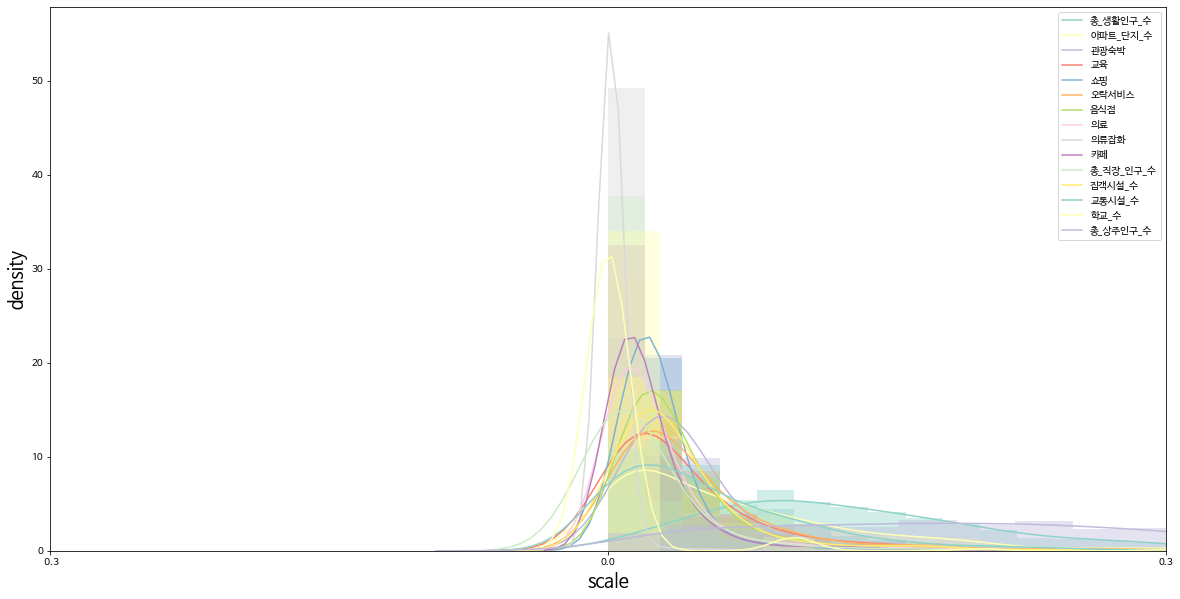

In [ ]:
color = sns.color_palette("Set3", len(minmax_scaling_data.columns))
plt.rcParams['figure.figsize'] = (20, 10)
for idx, column in enumerate(num_columns):
  sns.distplot(minmax_scaling_data[column], color=color[idx])

plt.legend(num_columns)
plt.ylabel('density', fontsize=18)
plt.xlabel('scale', fontsize=18)
plt.xlim([-0.3, 0.3])
plt.xticks([-0.3, 0, 0.3])
plt.show()

<br>

### 5-2. 표준화 (Standardization)

전반적으로 아주 살짝 편향되는 분포가 나타났지만 그 정도가 크지 않으므로 정규화까지 진행한 상태에서 분석을 진행한다. 클러스터링에 문제가 생겼다고 판단할 경우 아래의 코드를 실행하여 z-score (표준점수)를 통해 표준화를 진행한다.

In [ ]:
# standard_scaler = StandardScaler()
# standard_scaling_data = standard_scaler.fit_transform(minmax_scaling_data[num_columns])

In [ ]:
# standard_scaling_data.to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/scaling_data.csv')